# Load libraries

In [11]:
import csv
import networkx as nx
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import collections

# Define functions

In [12]:
from functions import *

# Main code 

Train matrix dimensionality:  (1423, 3)
Test matrix dimensionality:  (702, 3)


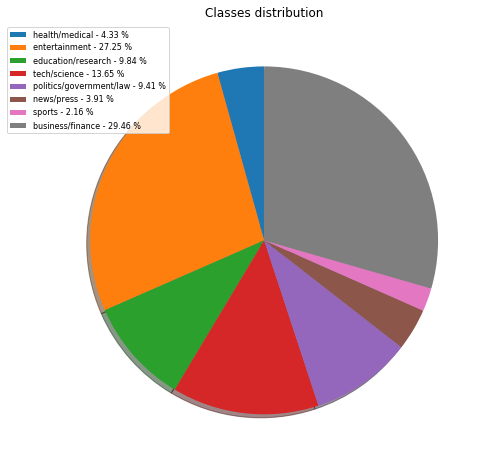

In [13]:
G = nx.read_weighted_edgelist('edgelist.txt', create_using=nx.DiGraph())

X,y = get_train_data(G)
X_test_submit = get_test_data(G)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Train matrix dimensionality: ", X_train.shape)
print("Test matrix dimensionality: ", X_test.shape)

#show class distribution 
show_class_distribution(y)



In [14]:
# Use logistic regression to classify the webpages of the test set
clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000)
#clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
create_prediction(clf,X_test_submit)

0.3176638176638177


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical 
import pandas as pd 


In [16]:
y_pd = pd.DataFrame(y_train)
for c in y_pd.columns: 
    y_pd[c] = y_pd[c].astype("category")  
    y_pd[c].fillna(y_pd[c].mode(),inplace=True)
    y_pd[c] = y_pd[c].cat.codes.values
y_train = np.array(y_pd.values).flatten()
y_train = to_categorical(y_train)
y_pd = pd.DataFrame(y_test)
for c in y_pd.columns: 
    y_pd[c] = y_pd[c].astype("category")  
    y_pd[c].fillna(y_pd[c].mode(),inplace=True)
    y_pd[c] = y_pd[c].cat.codes.values
y_test = np.array(y_pd.values).flatten()
y_test = to_categorical(y_test)

In [17]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=3))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test),callbacks=callbacks_list)

Train on 1423 samples, validate on 702 samples
Epoch 1/50
1423/1423 [==============================] - 0s 303us/step - loss: 3.1370 - accuracy: 0.2319 - val_loss: 2.3167 - val_accuracy: 0.1652

Epoch 00001: val_accuracy improved from -inf to 0.16524, saving model to weights.best.hdf5
Epoch 2/50
1423/1423 [==============================] - 0s 119us/step - loss: 2.4489 - accuracy: 0.2073 - val_loss: 2.1426 - val_accuracy: 0.2493

Epoch 00002: val_accuracy improved from 0.16524 to 0.24929, saving model to weights.best.hdf5
Epoch 3/50
1423/1423 [==============================] - 0s 121us/step - loss: 2.4121 - accuracy: 0.2748 - val_loss: 2.2417 - val_accuracy: 0.2920

Epoch 00003: val_accuracy improved from 0.24929 to 0.29202, saving model to weights.best.hdf5
Epoch 4/50
1423/1423 [==============================] - 0s 109us/step - loss: 2.2112 - accuracy: 0.2706 - val_loss: 1.9676 - val_accuracy: 0.3134

Epoch 00004: val_accuracy improved from 0.29202 to 0.31339, saving model to weights.be

1423/1423 [==============================] - 0s 105us/step - loss: 1.7702 - accuracy: 0.3071 - val_loss: 1.7623 - val_accuracy: 0.3063

Epoch 00040: val_accuracy did not improve from 0.32194
Epoch 41/50
1423/1423 [==============================] - 0s 117us/step - loss: 1.7768 - accuracy: 0.2952 - val_loss: 1.7600 - val_accuracy: 0.2977

Epoch 00041: val_accuracy did not improve from 0.32194
Epoch 42/50
1423/1423 [==============================] - 0s 106us/step - loss: 1.7654 - accuracy: 0.3113 - val_loss: 1.7564 - val_accuracy: 0.2934

Epoch 00042: val_accuracy did not improve from 0.32194
Epoch 43/50
1423/1423 [==============================] - 0s 100us/step - loss: 1.7646 - accuracy: 0.2944 - val_loss: 1.7536 - val_accuracy: 0.3091

Epoch 00043: val_accuracy did not improve from 0.32194
Epoch 44/50
1423/1423 [==============================] - 0s 100us/step - loss: 1.7606 - accuracy: 0.3148 - val_loss: 1.7552 - val_accuracy: 0.3091

Epoch 00044: val_accuracy did not improve from 0.321

In [19]:
model.load_weights("weights.best.hdf5")
print(model.evaluate(X_test,y_test))

y_pred = model.predict(X_test_submit)

702/702 [==============================] - 0s 64us/step
[1.7972093633776716, 0.32193732261657715]


In [20]:
create_prediction(clf,y_pred)
